In [1]:
import os
new_directory = "~/DSCT/src/"
os.chdir(new_directory)



In [2]:
import DSCT_load
import DSCT_train
import diopy
import torch
import scanpy as sc

In [3]:
## sc_data=diopy.input.read_h5(file = "E:/doctor/自研/mapping/data/SCT/st_CB4_filter.h5")#reference
import diopy
import torch
import scanpy as sc

gene_number2=200

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#read
sc_data=sc.read_h5ad("~/DSCT/sc/sc_anno_CTX_human_ExN.h5ad")
st_data=diopy.input.read_h5(file = '~/st/CTX_merfish_human.h5')


/home/zju/miniconda3/envs/tangram-env/lib/python3.8/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


In [4]:
#parameter
result_save_path="~/DSCT/result/MERFISH_human_predictions_"+str(gene_number2)
anno="Subclass"
train_num=80
model_save_path="~/DSCT/model/"+str(gene_number2)+"_"
num_classes = len(set(sc_data.obs[anno]))

In [5]:
#data processing
sc_data,st_data=DSCT_load.fmap_load(sc_data,st_data,anno,gene_number2,device)

/home/zju/miniconda3/envs/tangram-env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/zju/miniconda3/envs/tangram-env/lib/python3.8/site-packages/cosg/cosg.py:115: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


**finished identifying marker genes by COSG**
Epoch [0/10], Loss: 2.1851
Epoch [2/10], Loss: 2.0283
Epoch [4/10], Loss: 1.7222
Epoch [6/10], Loss: 1.4635
Epoch [8/10], Loss: 1.3116


In [6]:
#traning&output
DSCT_train.fmap_train(sc_data,st_data,result_save_path,model_save_path,train_num,num_classes,anno,device)

/data/xyh_desktop/mapping/github/DSCT/src/DSCT_train.py:47: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_data.obs["type_integer"] = cell_types_integer


Epoch [10/80], Loss: 0.4973, Validation Accuracy: 91.53%
Epoch [20/80], Loss: 0.2461, Validation Accuracy: 95.04%
Epoch [30/80], Loss: 0.1504, Validation Accuracy: 97.20%
Epoch [40/80], Loss: 0.1075, Validation Accuracy: 97.84%
Epoch [50/80], Loss: 0.1310, Validation Accuracy: 97.78%
Epoch [60/80], Loss: 0.0539, Validation Accuracy: 98.61%
Epoch [70/80], Loss: 0.0469, Validation Accuracy: 98.81%
Epoch [80/80], Loss: 0.0409, Validation Accuracy: 98.90%


/data/xyh_desktop/mapping/github/DSCT/src/DSCT_train.py:136: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  st_data.obs['predicted_classes'] = predicted_labels


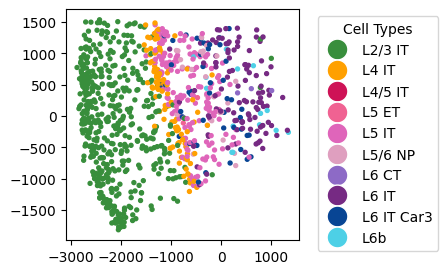

In [7]:
#plot
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

coor_x = st_data.obs['imagerow']
coor_y = st_data.obs['imagecol']
predicted_labels = st_data.obs['predicted_classes']
cell_type_to_color = {

    'L2/3 IT': "#388E3C", 
    'L4 IT': "#FFA000",    
    'L4/5 IT': "#CE1256", 
    'L5 ET': "#F06292",    
    'L5 IT': "#DF65BA",   
    'L5/6 NP': "#DF9FBF",  
    'L6 CT': "#8D6AC6",    
    'L6 IT': "#762A83",    
    'L6 IT Car3': "#084594", 
    'L6b': "#4DD0E6"       
}


colors = [cell_type_to_color[label] for label in predicted_labels]

fig, ax = plt.subplots(figsize=(3, 3))
scatter = ax.scatter(coor_x, coor_y, c=colors, s=8)

legend_elements = [Line2D([0], [0], marker='o', color='w', label=cell_type, 
                          markerfacecolor=color, markersize=15) 
                   for cell_type, color in cell_type_to_color.items()]
ax.legend(handles=legend_elements, title='Cell Types', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()
